<a href="https://colab.research.google.com/github/Surya2004-janardhan/colab/blob/main/Happy_or_sad_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import  tensorflow as tf
import matplotlib
import cv2

In [14]:
import imghdr

In [15]:
image_exts = ['jpeg','jpg','bmp','png']

In [16]:
import os
print(os.listdir('data'))
for image_class in os.listdir('data'):
    for image in os.listdir(os.path.join('data',image_class)):
        # print(image)
        image_path = os.path.join('data',image_class,image)
        # print(image_path)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip is None or tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
        except Exception as e:
          print('issue with image{}').formate(image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 175 files belonging to 2 classes.


In [ ]:
 data = data.map(lambda x,y :(x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

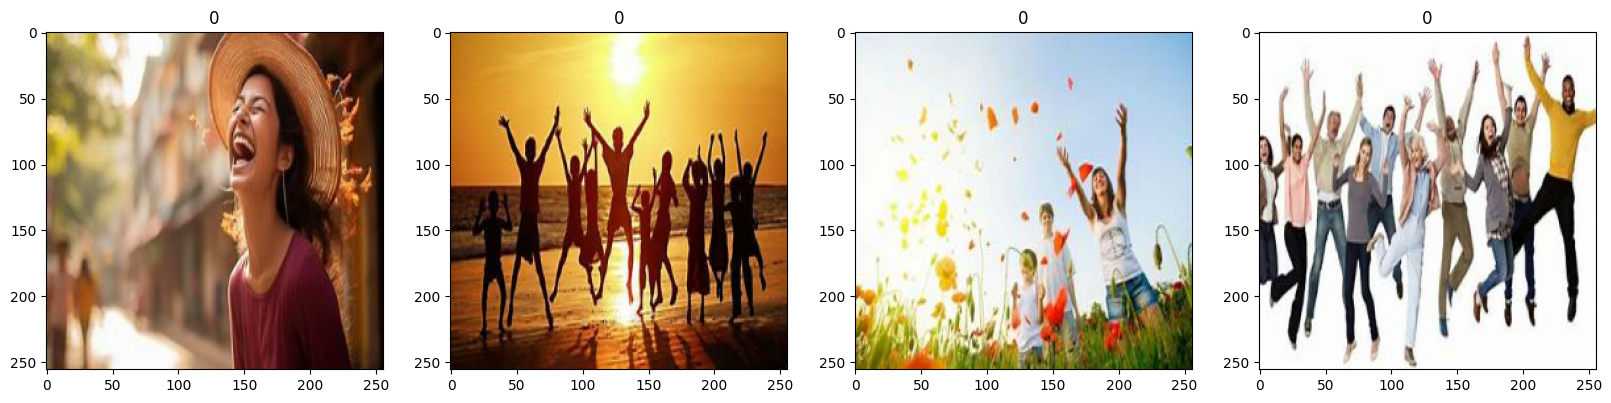

In [ ]:
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = data.map(lambda x,y: (x/255,y))

In [ ]:
 data.as_numpy_iterator().next()

(array([[[[0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         ...,
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5677 - loss: 0.5367 - val_accuracy: 0.8438 - val_loss: 0.3478
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8313 - loss: 0.3759 - val_accuracy: 0.9062 - val_loss: 0.2231
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8969 - loss: 0.2435 - val_accuracy: 0.9062 - val_loss: 0.1848
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9229 - loss: 0.1655 - val_accuracy: 1.0000 - val_loss: 0.1428
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9688 - loss: 0.1611 - val_accuracy: 0.9688 - val_loss: 0.0688
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9896 - loss: 0.0396 - val_accuracy: 1.0000 - val_loss: 0.0470
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9969 - loss: 0.0539 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9854 - loss: 0.0514 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 9/20
4/4 

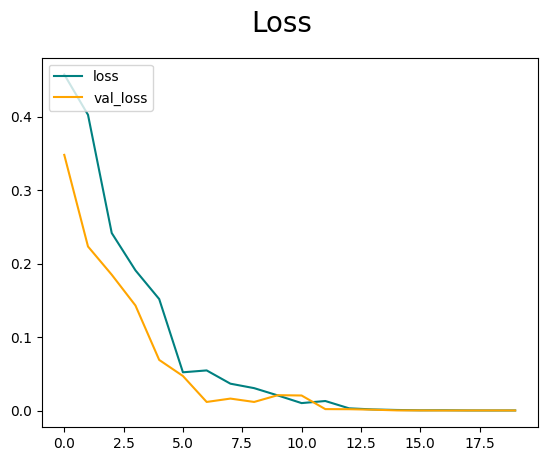

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [ ]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [34]:
import cv2

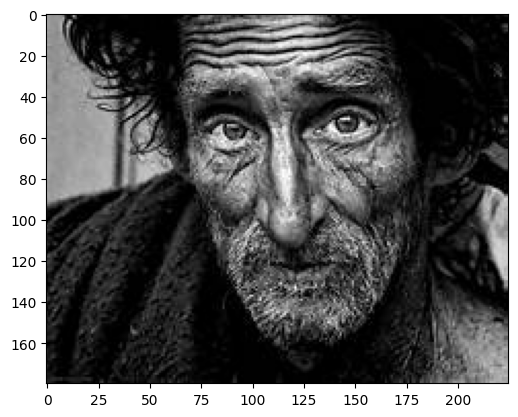

In [38]:

from matplotlib import pyplot as plt
img = cv2.imread('th78.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

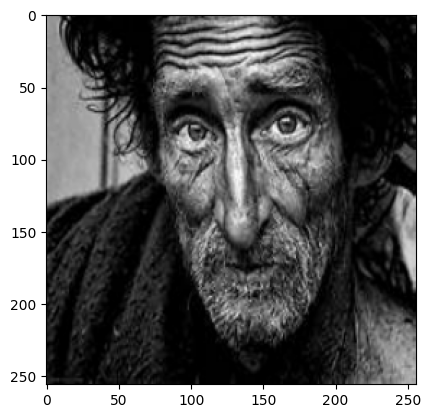

In [39]:

import tensorflow as tf
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [42]:
yhat = new_model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
  print("sad")
else:
  print("happy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
sad


In [ ]:
yhat

array([[0.00071039]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
model .save(os.path.join('C:\datasets','happysadmodel.h5'))
# print(os.path.join('models','happysadmodel.h5'))

In [18]:
from tensorflow.keras.models import load_model

# Save your model
# model.save('happysadmodel.h5')  # Saves it in the current working directory


In [ ]:
from google.colab import files

# Download the model file
files.download('happysadmodel.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
new_model = load_model('happysadmodel.h5')

In [ ]:
new_model


<Sequential name=sequential, built=True>

In [33]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('th15.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


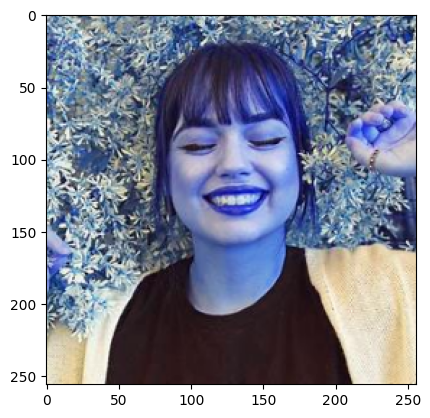

In [22]:

import tensorflow as tf
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [26]:
import numpy as np

yhat = new_model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
  print("sad face class ")
else:
  print("happy face class")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
happy face class


In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
if yhat_new > 0.5:
  print("sad")
else:
  print("happy")


happy
